# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hasbi Hussein Deri
- **Email:** hasbihusseinderi@gmail.com
- **ID Dicoding:** hasbihd

## Menentukan Pertanyaan Bisnis

- Apakah lebih banyak orang yang menyewa sepeda pada akhir pekan dibandingkan dengan hari kerja?
- Bagaimana suhu memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load data day.csv menjadi dataframe pandas dan menampilkan data teratas
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load data hour.csv menjadi dataframe pandas dan menampilkan data teratas
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dalam dataset bike sharing terdapat 2 data, yaitu data penyewaan sepeda dalam skala jam dan hari
- xxx

### Assessing Data

##### Assessing day_df dataframe

DataFrame `day_df` Columns

| Column Name     | Description                                                                                   |
|------------------|-----------------------------------------------------------------------------------------------|
| **instant**      | A unique identifier for each record (row).                                                  |
| **dteday**       | The date of the record.                                                                      |
| **season**       | Season on the recorded day, represented numerically:                                        |
|                  | - `1` = Spring                                                                                |
|                  | - `2` = Summer                                                                                |
|                  | - `3` = Fall                                                                                  |
|                  | - `4` = Winter                                                                                |
| **yr**           | The year of the record:                                                                       |
|                  | - `0` = 2011                                                                                 |
|                  | - `1` = 2012                                                                                 |
| **mnth**         | The month of the record, ranging from `1` (January) to `12` (December).                    |
| **holiday**      | Indicates if the day is a holiday:                                                           |
|                  | - `1` = Holiday                                                                               |
|                  | - `0` = Non-holiday                                                                          |
| **weekday**      | Day of the week:                                                                              |
|                  | - `0` = Sunday, `1` = Monday, ..., `6` = Saturday                                           |
| **workingday**   | Specifies if the day is a working day:                                                       |
|                  | - `1` = Working day                                                                          |
|                  | - `0` = Weekend or holiday                                                                    |
| **weathersit**   | Weather condition on the day, categorized as:                                               |
|                  | - `1` = Clear or partly cloudy                                                                |
|                  | - `2` = Misty or cloudy                                                                       |
|                  | - `3` = Light rain or snow                                                                    |
|                  | - `4` = Heavy rain or snow                                                                    |
| **temp**         | Normalized temperature in Celsius (scaled between `0` and `1`).                             |
| **atemp**        | Normalized "feels like" temperature in Celsius (also scaled between `0` and `1`).           |
| **hum**          | Normalized humidity level (scaled between `0` and `1`).                                     |
| **windspeed**    | Normalized wind speed (scaled between `0` and `1`).                                         |
| **casual**       | Count of casual (non-registered) users who rented bikes on that day.                       |
| **registered**    | Count of registered users who rented bikes on that day.                                     |
| **cnt**          | Total number of bike rentals on that day (sum of casual and registered users).              |


In [4]:
# menampilkan info umum dari dataframe day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# melihat jumlah kolom yang kosong dari day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# mengecek jumlah baris yang memiliki nilai yang sama/duplikat dari day_df
print('Number of duplicates row : ', day_df.duplicated().sum())

Number of duplicates row :  0


#### Assessing hour_df Dataframe

DataFrame Column Descriptions for `hour_df`

| Column Name  | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| `instant`    | A unique identifier for each hourly record.                                |
| `dteday`     | The date of the record.                                                    |
| `season`     | The season (1 = spring, 2 = summer, 3 = fall, 4 = winter).               |
| `yr`         | The year (0 = 2011, 1 = 2012).                                            |
| `mnth`       | The month (1 to 12).                                                      |
| `hr`         | The hour of the day (0 to 23).                                            |
| `holiday`    | Indicates if the day is a holiday (1 = holiday, 0 = not a holiday).      |
| `weekday`    | The day of the week (0 = Sunday, 1 = Monday, ..., 6 = Saturday).         |
| `workingday` | Whether it’s a working day (1 = working day, 0 = weekend or holiday).     |
| `weathersit` | Weather situation (1 = clear, 2 = misty/cloudy, 3 = light snow/rain, 4 = heavy rain/snow). |
| `temp`       | Normalized temperature in Celsius (scaled to [0, 1]).                     |
| `atemp`      | Normalized "feels like" temperature in Celsius (scaled to [0, 1]).       |
| `hum`        | Normalized humidity (scaled to [0, 1]).                                   |
| `windspeed`  | Normalized wind speed (scaled to [0, 1]).                                 |
| `casual`     | Number of casual (non-registered) users renting bikes during the hour.    |
| `registered`  | Number of registered users renting bikes during the hour.                  |
| `cnt`        | Total number of bike rentals (casual + registered) for that hour.        |


In [7]:
# menampilkan info umum dari dataframe hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# mengecek jumlah baris yang double/duplikat dari day_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# menampilkan baris yang memilikin nilai yang sama/duplikat dari hour_df
print("Number of duplicates row : ", hour_df.duplicated().sum())

Number of duplicates row :  0


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- there is no duplicated nor empty value in both data
- xxx

### Cleaning Data

#### Cleaning day_df data

In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# mengubah kolom dari day_df dataframe menjadi nama yang lebih mudah dipahami

day_df.rename(columns = {
    'dteday':'record_date','yr':'year','mnth':'month','weathersit':'weather_status','hum':'humidity','casual':'num_casual_user','registered':'num_registered_user','cnt':'total_rentals'
}, inplace = True)

In [13]:
# mengubah tipe data kolom 'record_date' dataframe day_df menjadi tipe data datetime agar pandas tahu bahwa kolom ini adalah waktu/datetime

day_df['record_date'] = pd.to_datetime(day_df['record_date'])

In [14]:
# mengubah beberapa nilai dari data_frame menjadi sesuatu yang lebih mudah dipahami dengan mengubah angka yang merepresentasikan nilai aslinya
day_df['season']=day_df['season'].replace({
    1:'springer',
    2:'summer',
    3:'fall',
    4:'winter'
})
day_df['month'] = day_df['month'].replace({
    1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

day_df['weekday'] = day_df['weekday'].replace({
    0: 'sunday', 1: 'sonday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'
})

day_df['year'] = day_df['year'].replace({
    0:'2011',
    1:'2012'
})

day_df

,instant,record_date,season,year,month,holiday,weekday,workingday,weather_status,temp,atemp,humidity,windspeed,num_casual_user,num_registered_user,total_rentals
0,1,2011-01-01,springer,2011,january,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,0,sonday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,0,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,0,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,2012,december,0,thursday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,2012,december,0,friday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,2012,december,0,saturday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,2012,december,0,sunday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- there is so much non readable columns and values
- xxx

#### Cleaning hour_df Dataframe

In [15]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [16]:
# mengubah nama kolom dari hour_df dataframe
hour_df.rename(columns = {
    'dteday':'record_date','yr':'year','hr':'hour','mnth':'month','weathersit':'weather_status','hum':'humidity','casual':'num_casual_user','registered':'num_registered_user','cnt':'total_rentals'
}, inplace = True)

In [17]:
# mengubah tipe data kolom 'record_date' dataframe hour_df menjadi tipe data datetime agar pandas tahu bahwa kolom ini adalah waktu/datetime

hour_df['record_date'] = pd.to_datetime(hour_df['record_date'])


In [18]:
# mengubah nilai dari dataframe hour_df menjadi nilai yang lebih mudah dipahami
hour_df['season'] = hour_df['season'].replace({
    1:'springer',
    2:'summer',
    3:'fall',
    4:'winter'
})

hour_df['weekday'] = hour_df['weekday'].replace({
    0: 'sunday', 1: 'sonday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'
})

hour_df['year'] = hour_df['year'].replace({
    0 :'2011',
    1:'2012'
})

hour_df['month'] = hour_df['month'].replace({
    1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

In [19]:
hour_df.head()

,instant,record_date,season,year,month,hour,holiday,weekday,workingday,weather_status,temp,atemp,humidity,windspeed,num_casual_user,num_registered_user,total_rentals
0,1,2011-01-01,springer,2011,january,0,0,saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,0,saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,0,saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,0,saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,0,saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

#### EDA day_df Dataframe

In [20]:
day_df.head()

,instant,record_date,season,year,month,holiday,weekday,workingday,weather_status,temp,atemp,humidity,windspeed,num_casual_user,num_registered_user,total_rentals
0,1,2011-01-01,springer,2011,january,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,0,sonday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,0,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,0,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
# mengelompokkan total rental berdasarkan musim
day_df.groupby(by='season').agg({
    'total_rentals':'sum'
})

,total_rentals
season,
fall,1061129
springer,471348
summer,918589
winter,841613


In [22]:
# mengelompokkan total rental berdasarkan cuaca
weather_rental_paterns = day_df.groupby(by = 'weather_status').agg({
    'total_rentals' :'sum',
    
})

weather_rental_paterns

,total_rentals
weather_status,
1,2257952
2,996858
3,37869


In [23]:
holiday_rental_patterns = day_df.groupby(by = 'holiday').agg(
    mean_total_rentals = ('total_rentals','mean'),
    sum_total_rentals = ('total_rentals','sum')
)

holiday_rental_patterns

,mean_total_rentals,sum_total_rentals
holiday,,
0,4527.104225,3214244
1,3735.000000,78435


In [24]:
number_of_daily_user = day_df.groupby(by = 'weekday').agg({
    'record_date':'nunique',
    'num_casual_user':'sum',
    'num_registered_user':'sum',
    'total_rentals':['max', 'min', 'mean','sum']
})

number_of_daily_user

record_date num_casual_user num_registered_user total_rentals        \
              nunique             sum                 sum           max   min   
weekday                                                                         
friday            104           78238              409552          8362  1167   
saturday          105          153852              323955          8714   627   
sonday            105           70784              384719          7525    22   
sunday            105          140521              303506          8227   605   
thursday          104           61460              423935          7804   431   
tuesday           104           57843              411266          7767   683   
wednesday         104           57319              415729          8173   441   

                                
                  mean     sum  
weekday                         
friday     4690.288462  487790  
saturday   4550.542857  477807  
sonday     4338.123810  455503  
sunday     4228.828571  444027  
thursday   4667.259615  485395  
tuesday    4510.663462  469109  
wednesday  4548.538462  473048

In [25]:
# analisis correlation matrix
numeric_df = day_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                      instant   holiday  workingday  weather_status      temp  \
instant              1.000000  0.016145   -0.004337       -0.021477  0.150580   
holiday              0.016145  1.000000   -0.253023       -0.034627 -0.028556   
workingday          -0.004337 -0.253023    1.000000        0.061200  0.052660   
weather_status      -0.021477 -0.034627    0.061200        1.000000 -0.120602   
temp                 0.150580 -0.028556    0.052660       -0.120602  1.000000   
atemp                0.152638 -0.032507    0.052182       -0.121583  0.991702   
humidity             0.016375 -0.015937    0.024327        0.591045  0.126963   
windspeed           -0.112620  0.006292   -0.018796        0.039511 -0.157944   
num_casual_user      0.275255  0.054274   -0.518044       -0.247353  0.543285   
num_registered_user  0.659623 -0.108745    0.303907       -0.260388  0.540012   
total_rentals        0.628830 -0.068348    0.061156       -0.297391  0.627494   

                        ate

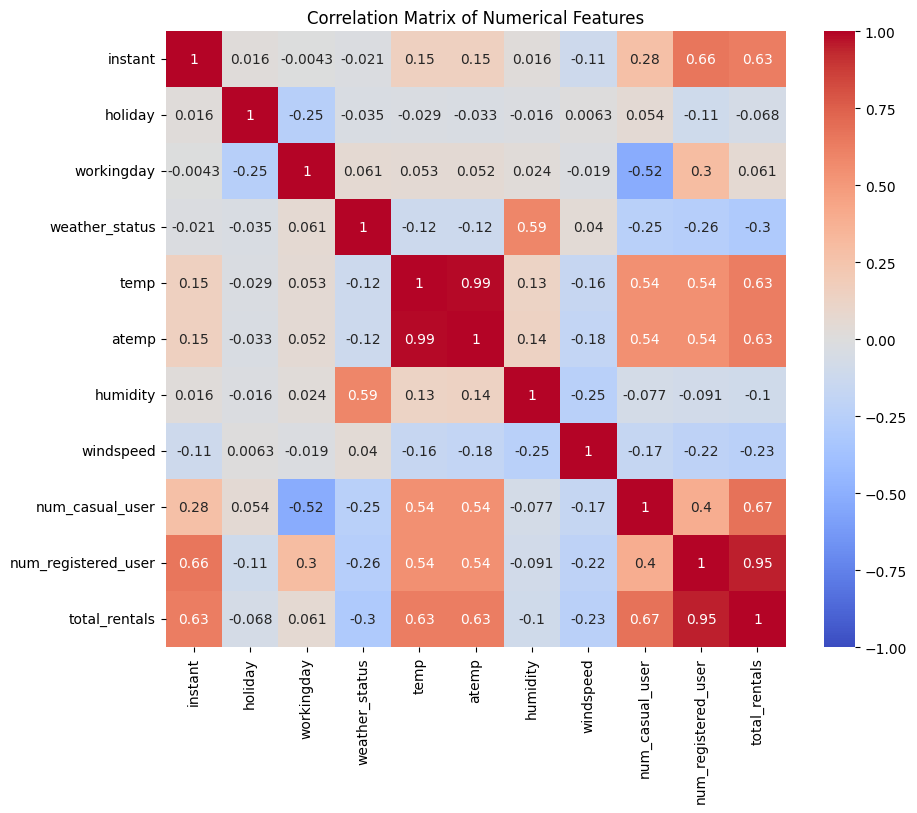

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### EDA hour_df dataframe

In [27]:
hour_df.head()

,instant,record_date,season,year,month,hour,holiday,weekday,workingday,weather_status,temp,atemp,humidity,windspeed,num_casual_user,num_registered_user,total_rentals
0,1,2011-01-01,springer,2011,january,0,0,saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,0,saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,0,saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,0,saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,0,saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan total penyewaan sepeda antara hari kerja dan akhir pekan pada masing-masing tahun (2011 dan 2012), serta bagaimana perubahan jumlah penyewaan tersebut dari tahun 2011 ke 2012?


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
# Memuat Dataset
df = pd.read_csv('dashboard/all_data.csv')

# Hitung jumlah hari unik per tahun, untuk menghindari bias dari jumlah hari dalam tahun yang mungkin jaih berbeda
days_per_year = df.groupby("year")["record_date"].nunique()

print("Jumlah hari per tahun:")
print(days_per_year)

day_distribution = (
    df
    .groupby(["year", "workingday"])
    .size()
    .unstack()
)

# hitung jumlah perbandingan weekend dan weekday pada tiap tahun untuk menghindari bias jumlah hari antara weekend dan weekday 
day_distribution.columns = ["Weekend/Holiday (0)", "Working Day (1)"]

print("\nDistribusi jumlah hari per tahun:")
print(day_distribution)

Jumlah hari per tahun:
year
2011    365
2012    366
Name: record_date, dtype: int64

Distribusi jumlah hari per tahun:
      Weekend/Holiday (0)  Working Day (1)
year                                      
2011                  115              250
2012                  116              250


Berdasarkan perhitungan jumlah hari, tahun 2011 terdiri dari 365 hari dan tahun 2012 terdiri dari 366 hari (tahun kabisat). Selisih hanya satu hari atau sekitar 0.27% secara proporsional.

Distribusi hari kerja dan akhir pekan juga relatif stabil pada kedua tahun tersebut. Pada tahun 2011 terdapat 250 hari kerja dan 115 akhir pekan/libur, sedangkan pada tahun 2012 terdapat 250 hari kerja dan 116 akhir pekan/libur.

Perbedaan jumlah observasi yang sangat kecil ini menunjukkan bahwa perbandingan total penyewaan antar tahun tidak mengalami bias yang signifikan akibat perbedaan jumlah hari.

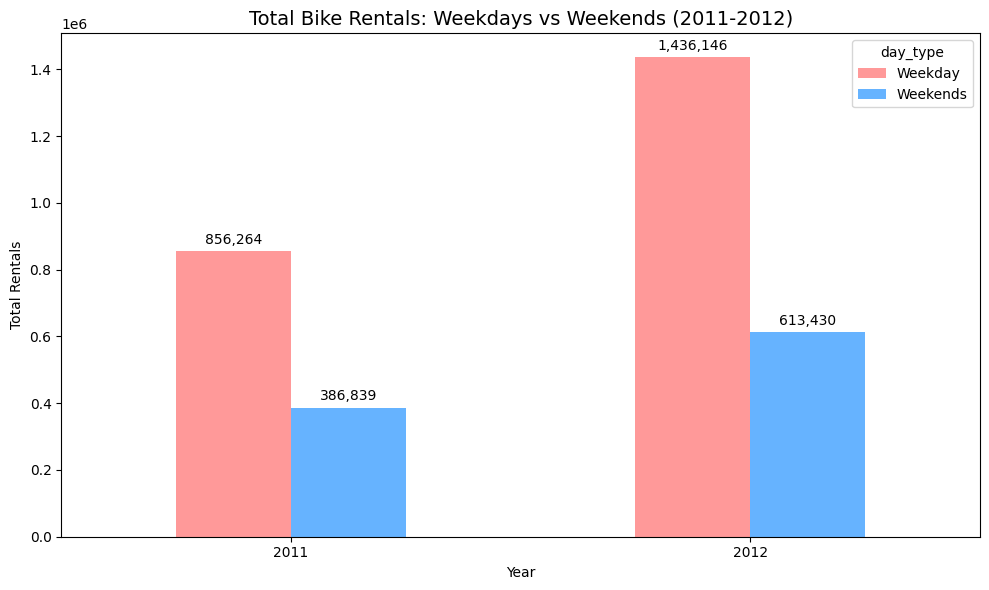

In [ ]:
# VISUALISASI 1

# Memberikan label yang lebih deskriptif pada kolom workingday
df['day_type'] = df['workingday'].map({1: 'Weekday', 0: 'Weekends'})

# Menghitung total penyewaan berdasarkan tahun dan tipe hari
workingday_rentals = df.groupby(['year', 'day_type'])['total_rentals'].sum().unstack()

# Membuat Bar Chart
plt.figure(figsize=(10, 6))
ax = workingday_rentals.plot(kind='bar', color=['#ff9999','#66b3ff'], ax=plt.gca())

# judul
plt.title('Total Bike Rentals: Weekdays vs Weekends (2011-2012)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)

# menampilkan angka pada bar chart
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
# rata rata total rental perhari
avg_per_year = day_df.groupby("year")["total_rentals"].mean()
print(avg_per_year)

# meghitung growth rate dari tahun 2011 ke tahun 2012
total_per_year = df.groupby("year")["total_rentals"].sum()

growth_rate = (
    (total_per_year[2012] - total_per_year[2011]) 
    / total_per_year[2011]
) * 100

print("\nPertumbuhan dari 2011 ke 2012:", round(growth_rate, 2), "%")

year
2011    3405.761644
2012    5599.934426
Name: total_rentals, dtype: float64

Pertumbuhan dari 2011 ke 2012: 64.88 %


Berdasarkan visualisasi total penyewaan sepeda, terlihat bahwa jumlah penyewaan pada tahun 2012 meningkat secara signifikan dibandingkan tahun 2011, baik pada hari kerja maupun akhir pekan.

Rata-rata penyewaan per hari juga meningkat dari:

 - 3.405 unit per hari (2011)

 - 5.599 unit per hari (2012)

Selain itu, total penyewaan mengalami pertumbuhan sebesar 64.88% dari tahun 2011 ke tahun 2012.

Karena pertumbuhan ini jauh melampaui 0.27% (selisih akibat satu hari tambahan), dapat disimpulkan bahwa peningkatan tersebut mencerminkan pertumbuhan permintaan yang nyata, bukan akibat perbedaan jumlah hari dalam setahun.

### Pertanyaan 2: Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda pada setiap musim (season) selama periode 2011–2012?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("dashboard/all_data.csv")

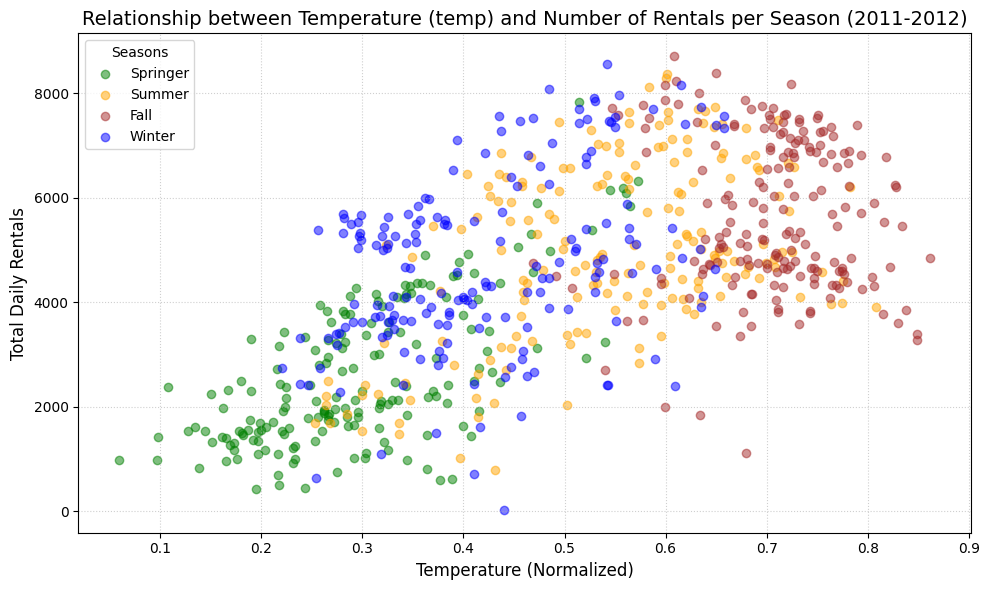

In [3]:
# Membuat Scatter Plot
plt.figure(figsize=(10, 6))
seasons = df['season'].unique()
colors = {'springer': 'green', 'summer': 'orange', 'fall': 'brown', 'winter': 'blue'}

for season in seasons:
    subset = df[df['season'] == season]
    plt.scatter(subset['temp'], subset['total_rentals'], 
                label=season.capitalize(), color=colors.get(season, 'gray'), alpha=0.5)

# Menambahkan judul dan label
plt.title('Relationship between Temperature (temp) and Number of Rentals per Season (2011-2012)', fontsize=14)
plt.xlabel('Temperature (Normalized)', fontsize=12)
plt.ylabel('Total Daily Rentals', fontsize=12)
plt.legend(title='Seasons')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

# Menyimpan visualisasi
plt.savefig('visualisasi_2_temp_season.png')
plt.show()

In [8]:
# korelasi keseluruhan
corr_overall = df["temp"].corr(df["total_rentals"])
print("Korelasi keseluruhan:", round(corr_overall, 3))

# korelasi per musim
for s in seasons:
    subset = df[df["season"] == s]
    corr = subset["temp"].corr(subset["total_rentals"])
    print(f"Korelasi musim {s}:", round(corr, 3))

Korelasi keseluruhan: 0.627
Korelasi musim springer: 0.669
Korelasi musim summer: 0.477
Korelasi musim fall: -0.033
Korelasi musim winter: 0.398


### Insight:
- Insight Pertanyaan 1 : Meskipun hari kerja secara jumlah lebih banyak dibandingkan akhir pekan, rata-rata penyewaan per hari pada hari kerja tetap lebih tinggi, menunjukkan bahwa permintaan sepeda cenderung lebih kuat pada hari kerja selama periode 2011–2012.
- Insight Pertanyaan 2 : Analisis korelasi menunjukkan bahwa secara keseluruhan terdapat hubungan positif yang cukup kuat antara suhu dan jumlah penyewaan sepeda selama periode 2011–2012 (r = 0.627). Namun, ketika dianalisis per musim, kekuatan hubungan tersebut bervariasi. Musim semi menunjukkan korelasi positif tertinggi (r = 0.669), mengindikasikan bahwa peningkatan suhu pada musim ini sangat berpengaruh terhadap peningkatan penyewaan. Sebaliknya, pada musim gugur korelasi hampir tidak ditemukan (r = -0.033), yang menunjukkan bahwa suhu bukan faktor dominan dalam menentukan jumlah penyewaan pada musim tersebut. Hasil ini mengindikasikan bahwa pengaruh suhu terhadap permintaan sepeda bersifat musiman dan tidak seragam sepanjang tahun.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1 : Mayoritas penyewaan sepeda terkonsentrasi pada hari kerja. Selain karena jumlah hari kerja lebih banyak, rata-rata penyewaan per hari pada hari kerja juga lebih tinggi dibandingkan akhir pekan. Pola ini mengindikasikan bahwa sepeda kemungkinan besar digunakan sebagai sarana mobilitas rutin, seperti perjalanan kerja atau aktivitas produktif lainnya, dibandingkan sebagai sarana rekreasi semata.
- Conclusion pertanyaan 2 : Variabel suhu menunjukkan hubungan positif yang cukup kuat terhadap jumlah penyewaan sepeda selama periode 2011–2012. Secara umum, peningkatan suhu diikuti dengan peningkatan jumlah penyewaan. Namun, pengaruh tersebut tidak seragam di setiap musim. Musim semi menunjukkan sensitivitas tertinggi terhadap perubahan suhu, sementara pada musim gugur pengaruh suhu hampir tidak terlihat. Hal ini mengindikasikan bahwa dampak suhu terhadap permintaan sepeda bersifat musiman dan kemungkinan dipengaruhi pula oleh faktor lain pada periode tertentu.

In [33]:
day_df.to_csv('dashboard/all_data.csv', index=False)